In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X,y= make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 3.93042408,  8.15321938],
       [-5.96980166,  6.51211546],
       [-5.78515963,  6.10695755],
       ...,
       [-3.09186885,  4.64359691],
       [-9.24461948,  5.16500359],
       [-9.29844393,  3.04222875]])

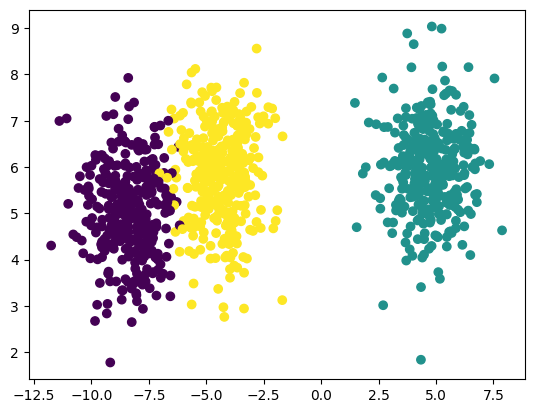

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
## standardization --feature sclaing techniques
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Elbow method to select k value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[1340.0000000000002,
 701.9892669028561,
 403.44722266827324,
 321.4443268352377,
 218.38748290355213,
 181.7886743432901,
 151.023017020719,
 132.82792850373687,
 118.87005800187703,
 104.37730601054015]

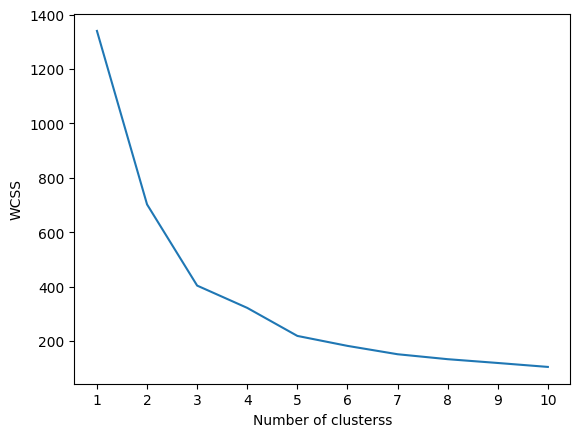

In [12]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusterss")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [14]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2,
       1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0,

In [15]:
y_pred=kmeans.predict(X_test_scaled)

In [16]:
y_pred

array([2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0,
       2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1,
       0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2,
       1, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0,
       1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

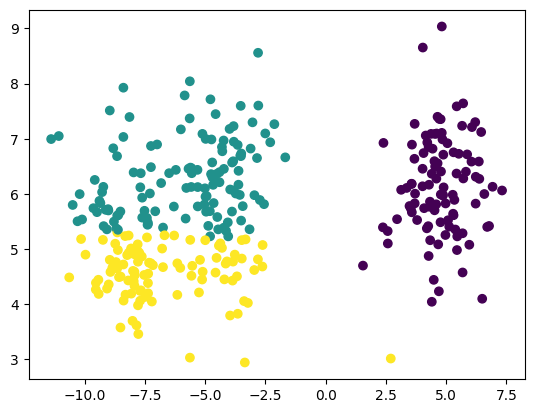

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

In [18]:
## for validatin the k value
## kneelocator
##silhoutee scoring

In [20]:
##kneelocator
from kneeed import KneeLocator

ModuleNotFoundError: No module named 'kneeed'

In [ ]:
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [ ]:
k1.elbow

In [ ]:
## silhouttee socing
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_cofficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=(silhouette_score(X_train_scaled,kmeans.labels_))
    silhouette_cofficients.append(score)

In [ ]:
silhouette_cofficients

In [ ]:
## plot elbow curve
plt.plot(range(2,11),silhouette_cofficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusterss")
plt.ylabel("Silhoutte coffecient")
plt.show()